In [39]:
import seaborn as sns
import pandas as pd
import numpy as np


In [55]:
diabet=pd.read_csv("diabetes.csv")
df=diabet.copy()
df.head()
#1. olarak  veri ön işlemeye almalıyız

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
df.isnull().values.any() #Hiç eksik değer var mı sorgusu 
#Eğer eksik değer olsaydı bunu düzeltmemiz gerekirdi. Çıkarmazsak verisetindeki güveninirliği düşürür. Yapısal mı rasgele mi ...
#Sıfır içeren değerler eksik değer olarak kabul edilir 
#Bu değerler NaN ile değiştirilirdi duruma göre de diğer gözlemlerin ortalamalarına göre drop ile eksik değerler doldurulurdu.


False

In [11]:
#2.adım olarak Veri Görselleştime ve Analizi
#Değişkenlerin analizi ve grafiklerle görsel sunum haline getirip istatistiksel özelliklerini bulmayı amaçlar.
df.corr() #Birbirleriyle olan korelasyonları yani ilişkilerini , bağlılıklarını gözlemleriz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [17]:
df[["Insulin","Age"]].corr()

,Insulin,Age
Insulin,1.000000,-0.042163
Age,-0.042163,1.000000


In [18]:
df[["Insulin","Age"]].cov()

,Insulin,Age
Insulin,13281.180078,-57.143290
Age,-57.143290,138.303046


In [13]:
!pip install researchpy
import researchpy as rp

In [16]:
rp.summary_cont(df[["Insulin","BMI","Age"]]) #güven aralığı standart sapması vb. gösterir

C:\Users\meric\anaconda3\Lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Insulin,768.0,79.7995,115.2440,4.1585,71.6361,87.9629
1,BMI,768.0,31.9926,7.8842,0.2845,31.4341,32.5511
2,Age,768.0,33.2409,11.7602,0.4244,32.4078,34.0739


<Axes: xlabel='Insulin', ylabel='Age'>

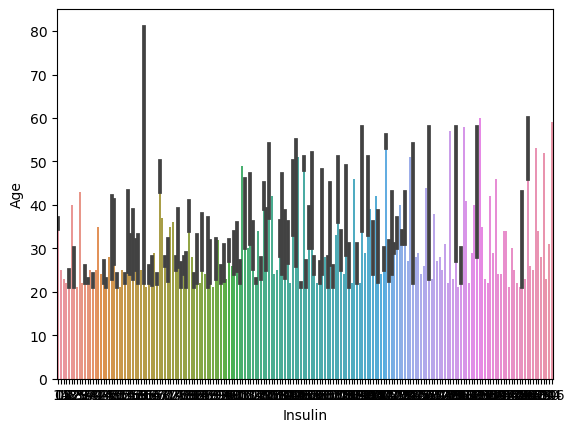

In [26]:
sns.barplot(x="Insulin",y="Age",data=df)

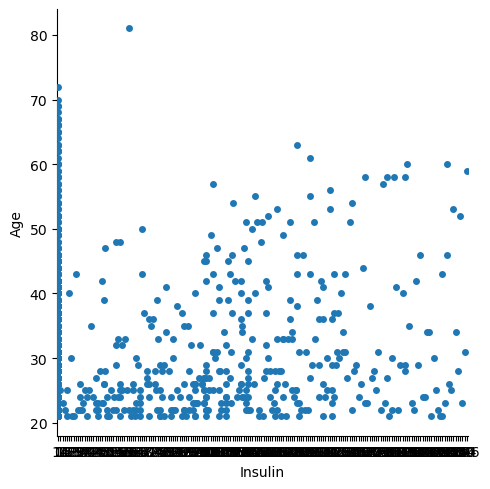

In [28]:
sns.catplot(x="Insulin",y="Age",data=df)

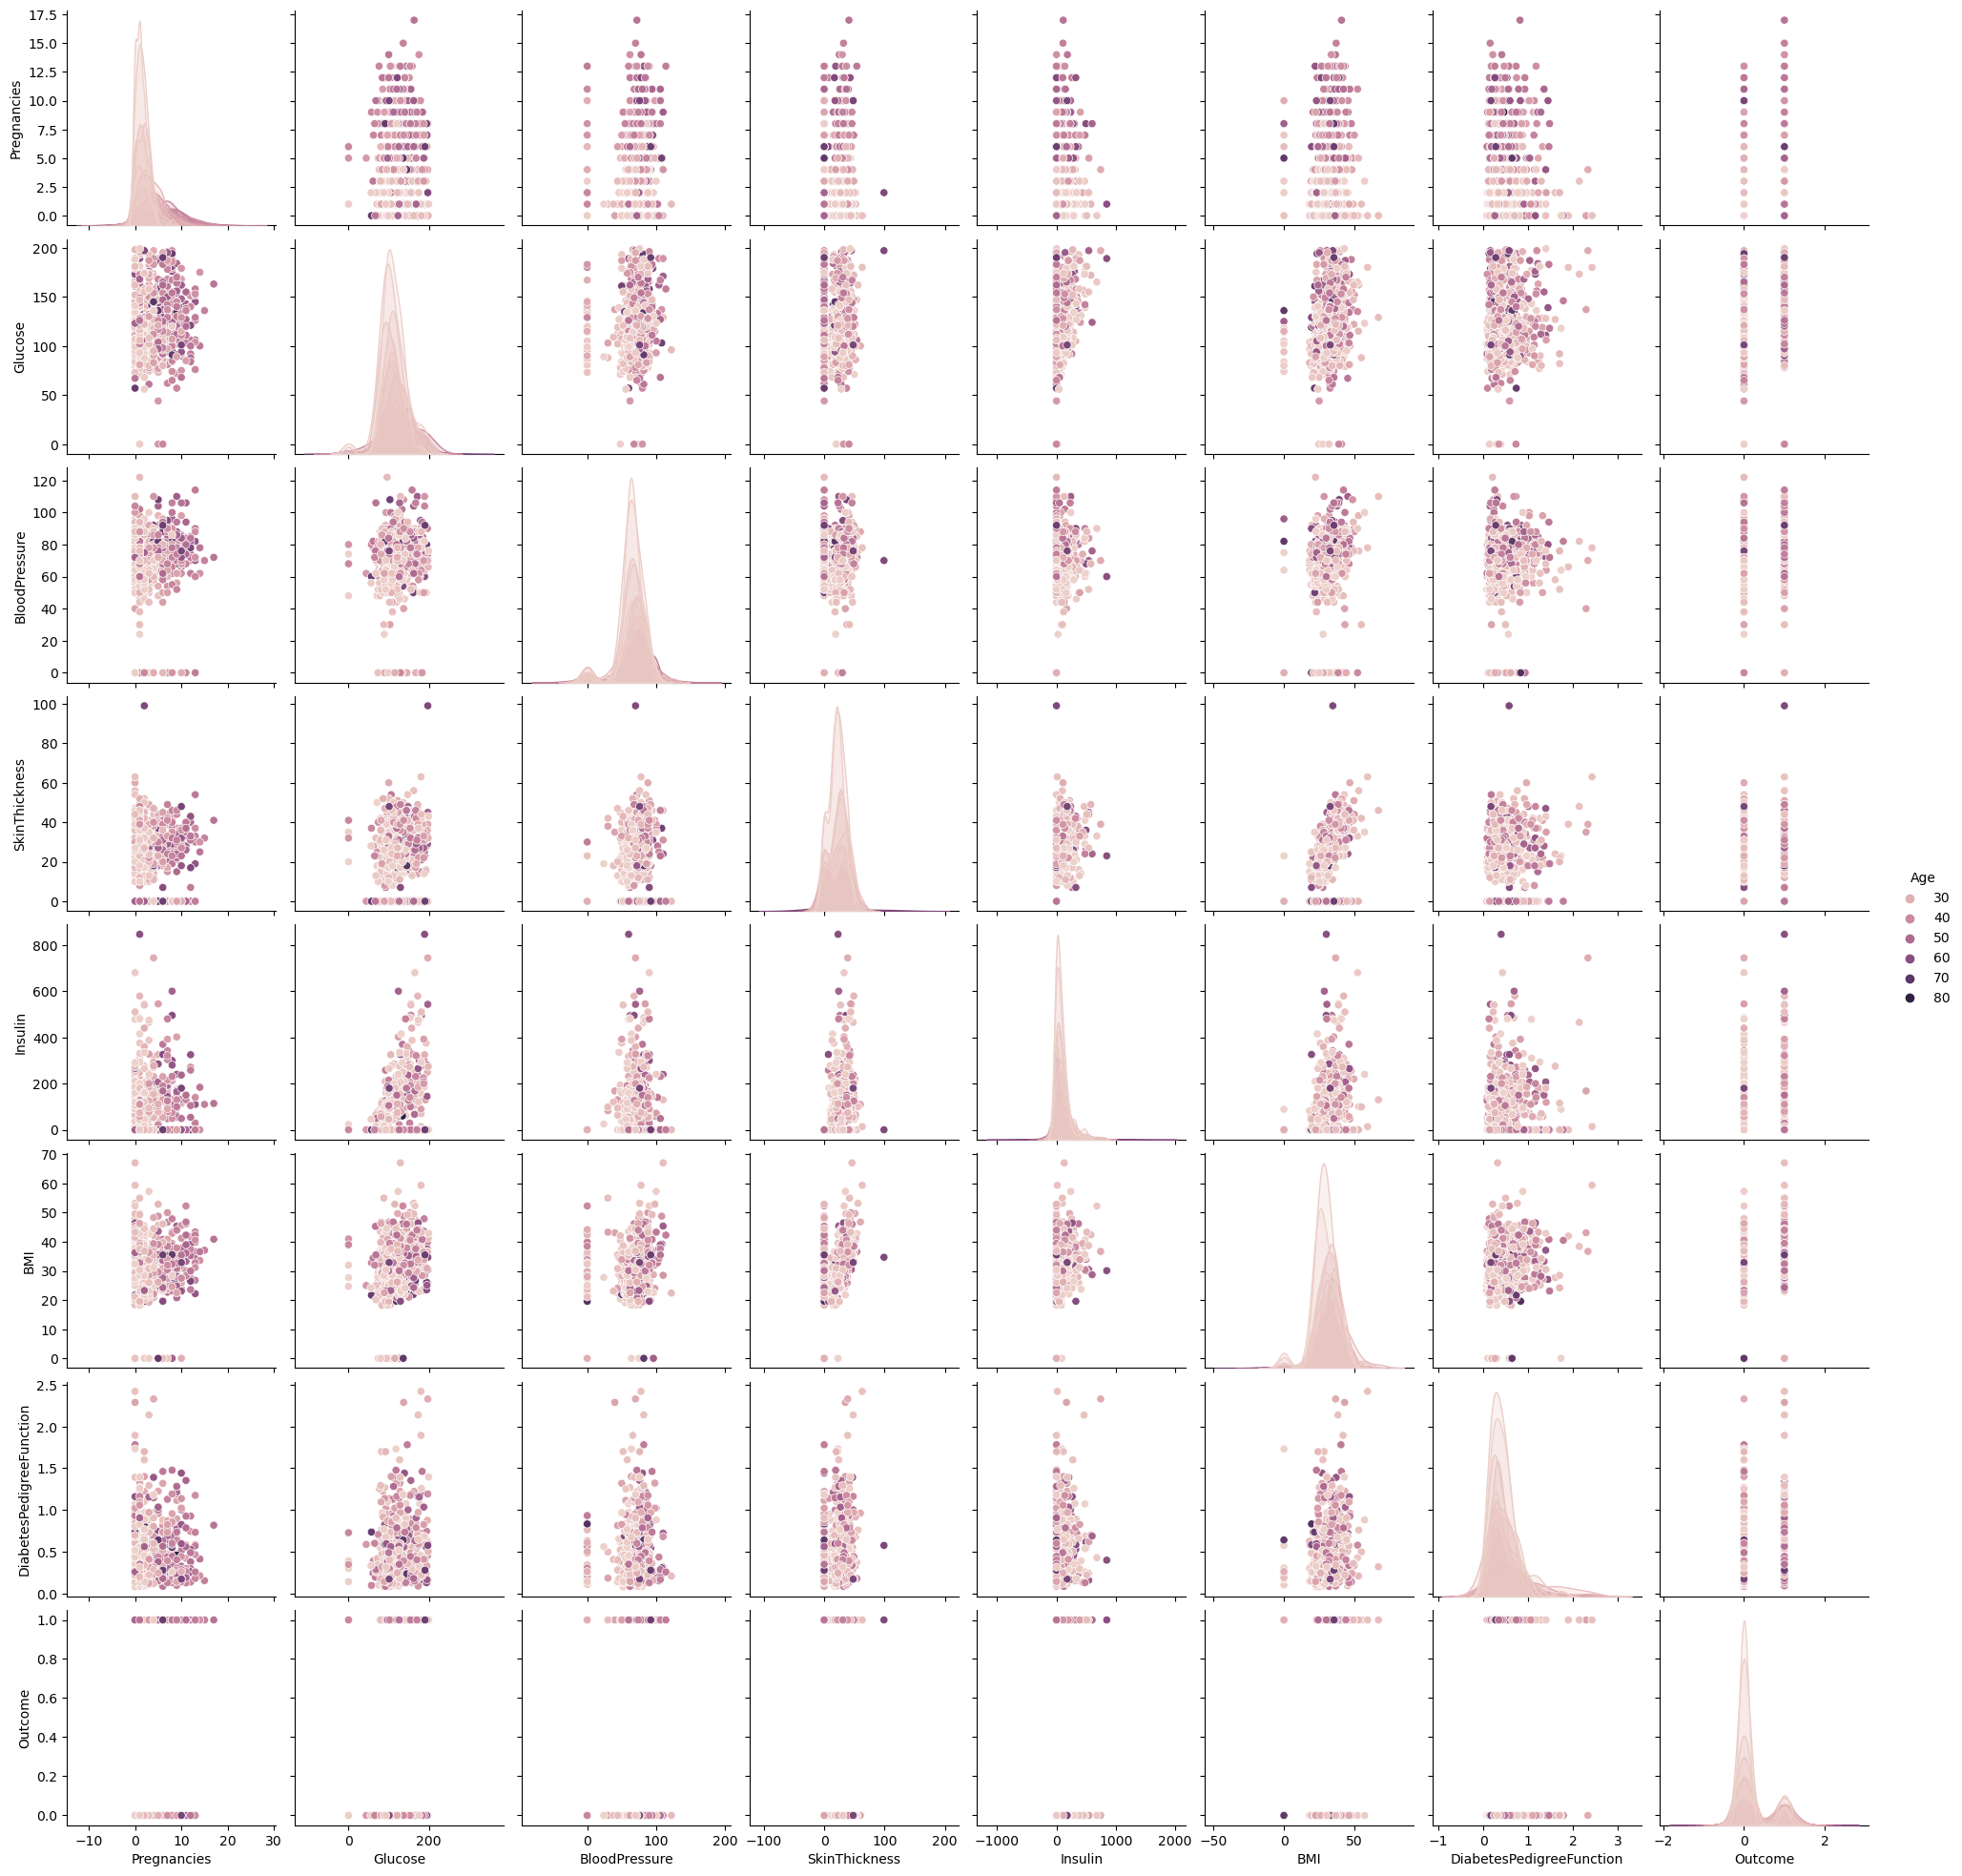

In [29]:
sns.pairplot(df,hue ="Age")

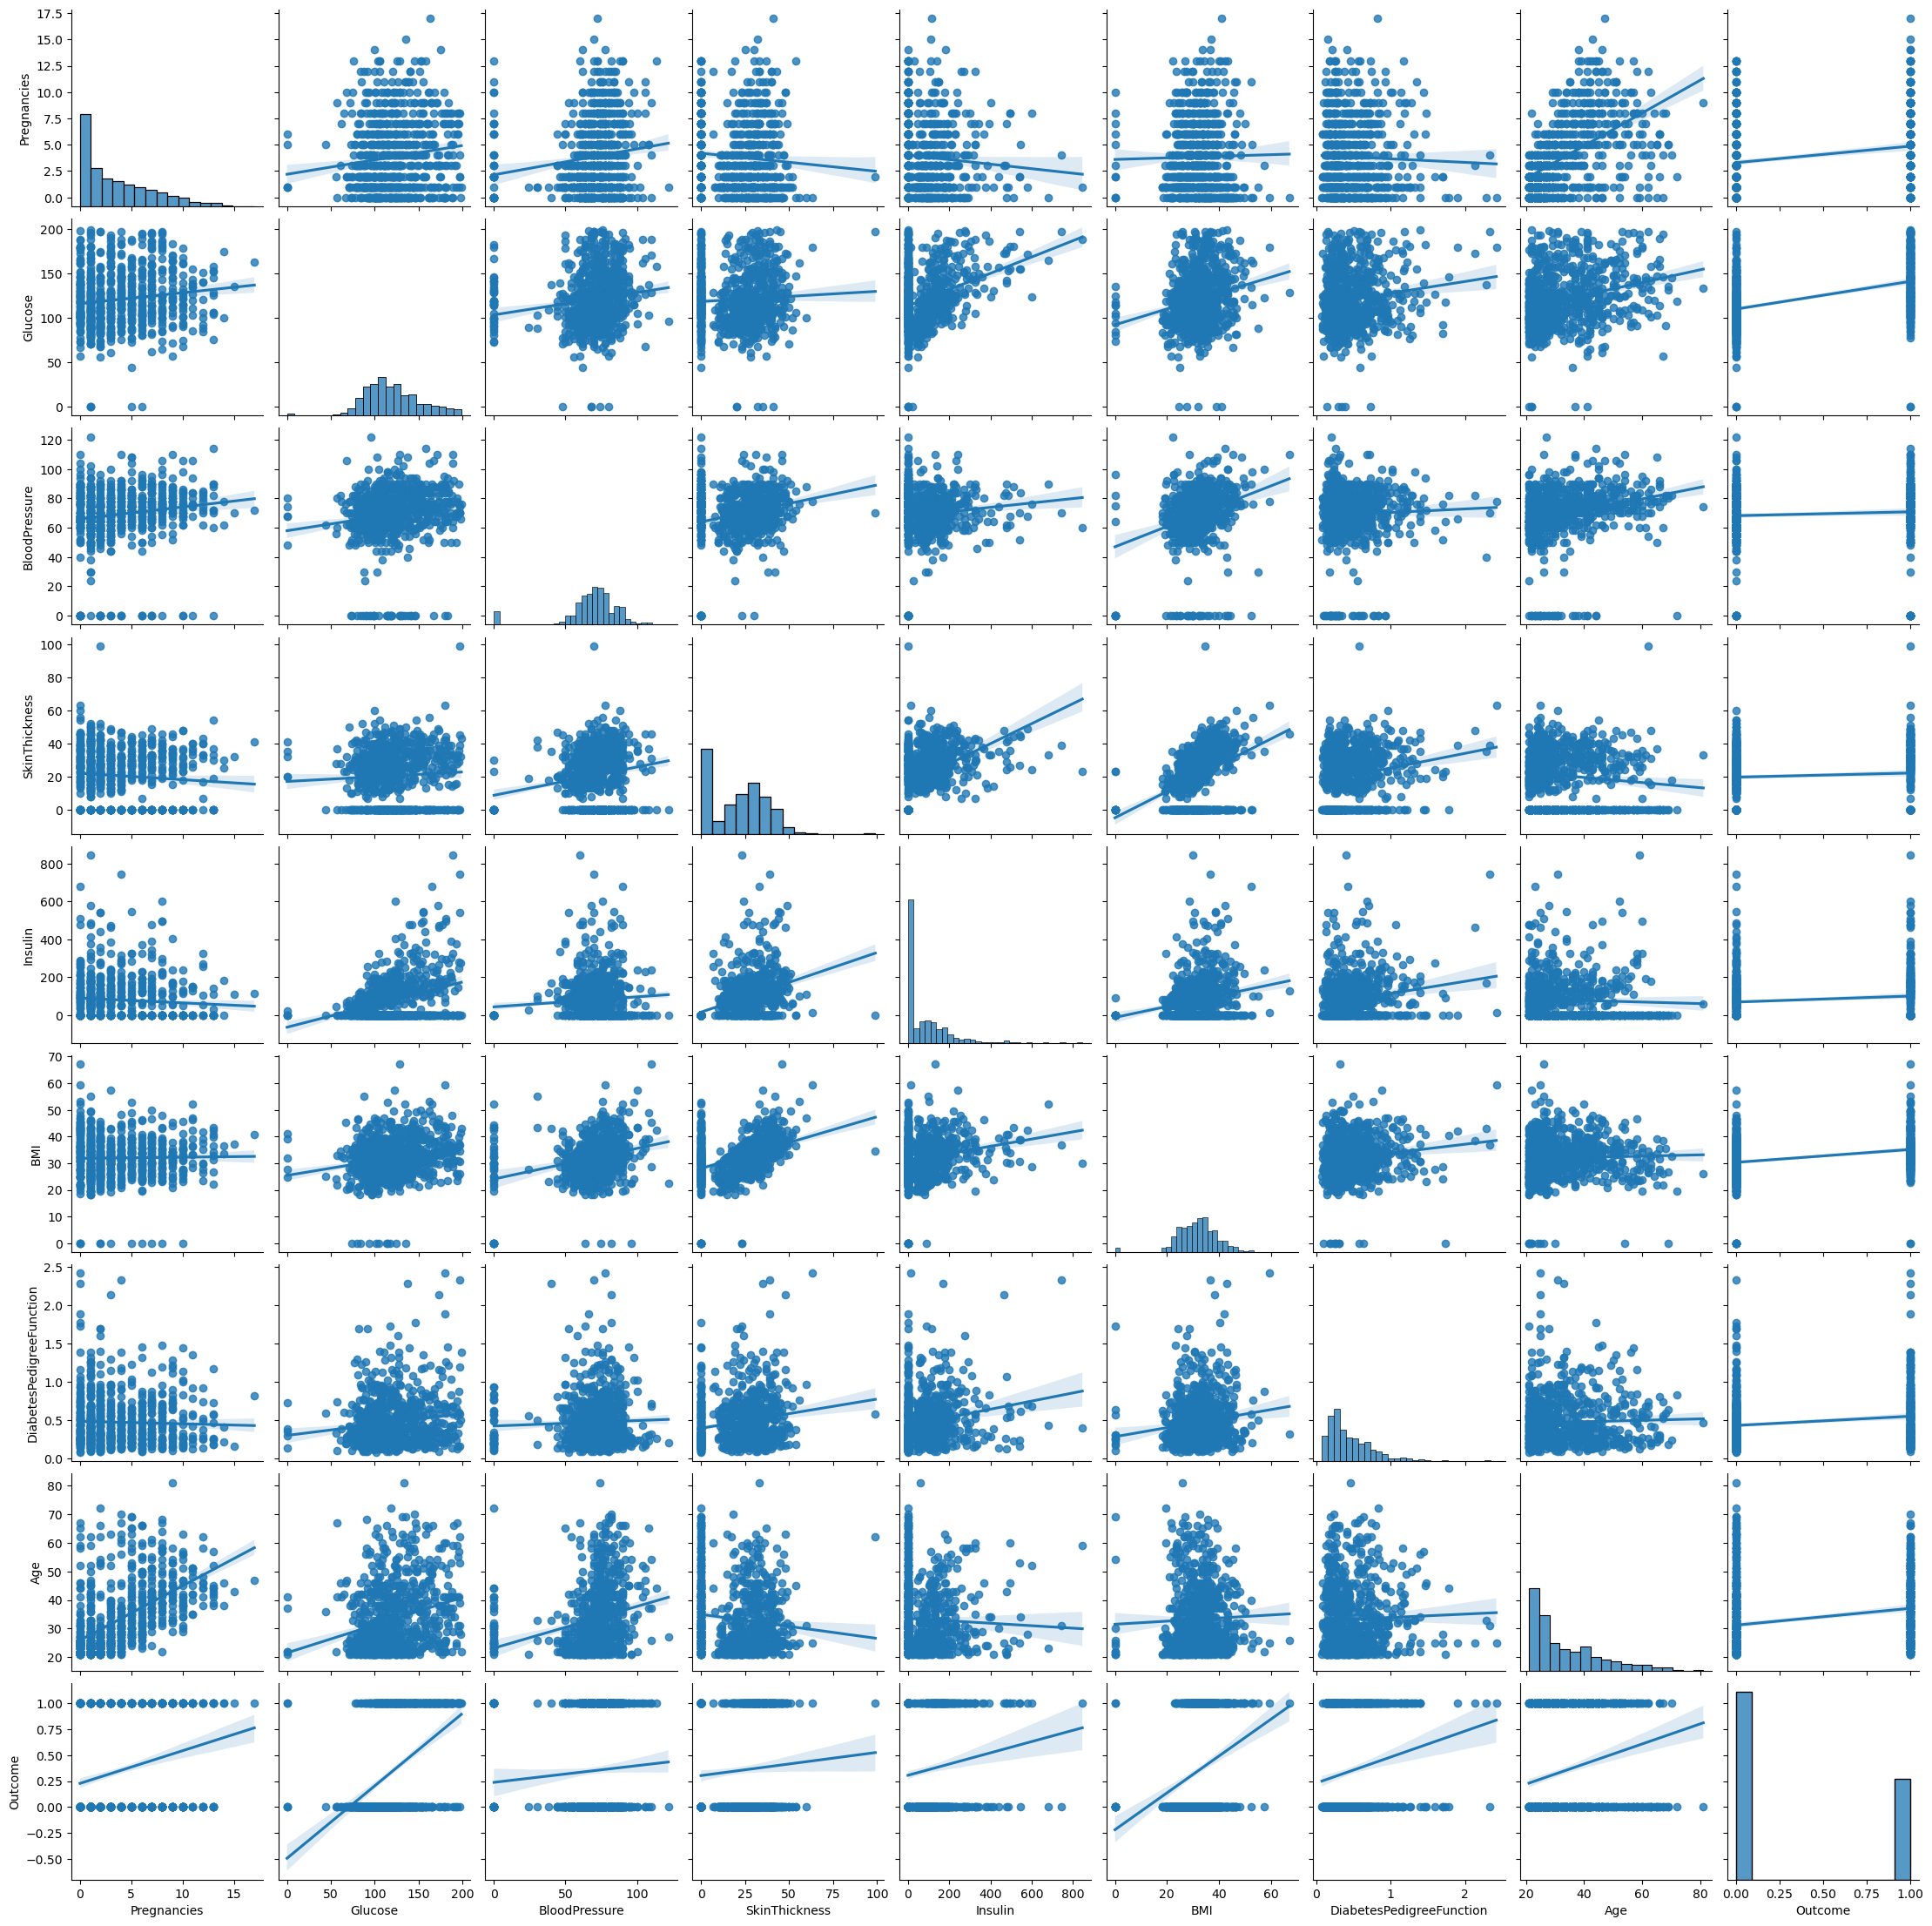

In [30]:
sns.pairplot(df,kind ="reg")  #Regresyon 

<Axes: xlabel='Age', ylabel='Insulin'>

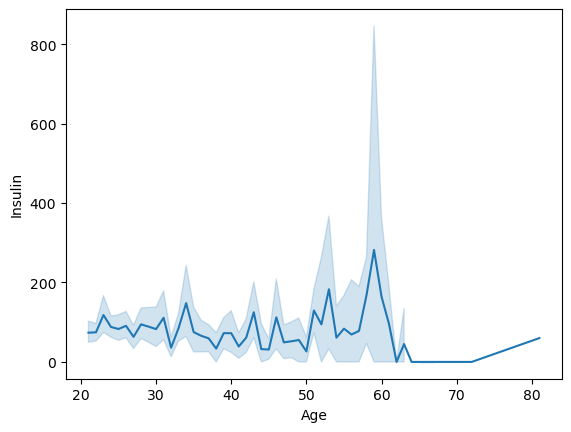

In [33]:
sns.lineplot(x="Age",y="Insulin",data=df)

<Axes: >

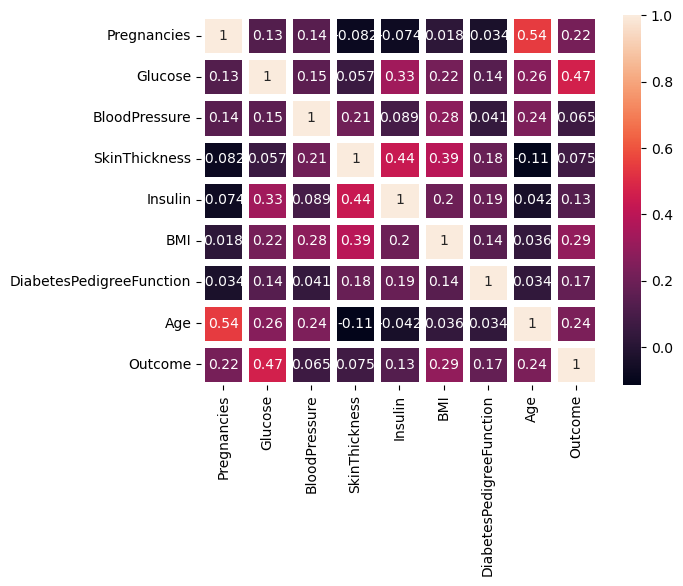

In [35]:
corr=df.corr()
sns.heatmap(corr,annot=True,linewidths=5) #Korelasyonların ısı haritası

In [4]:
import missingno as msno

<Axes: >

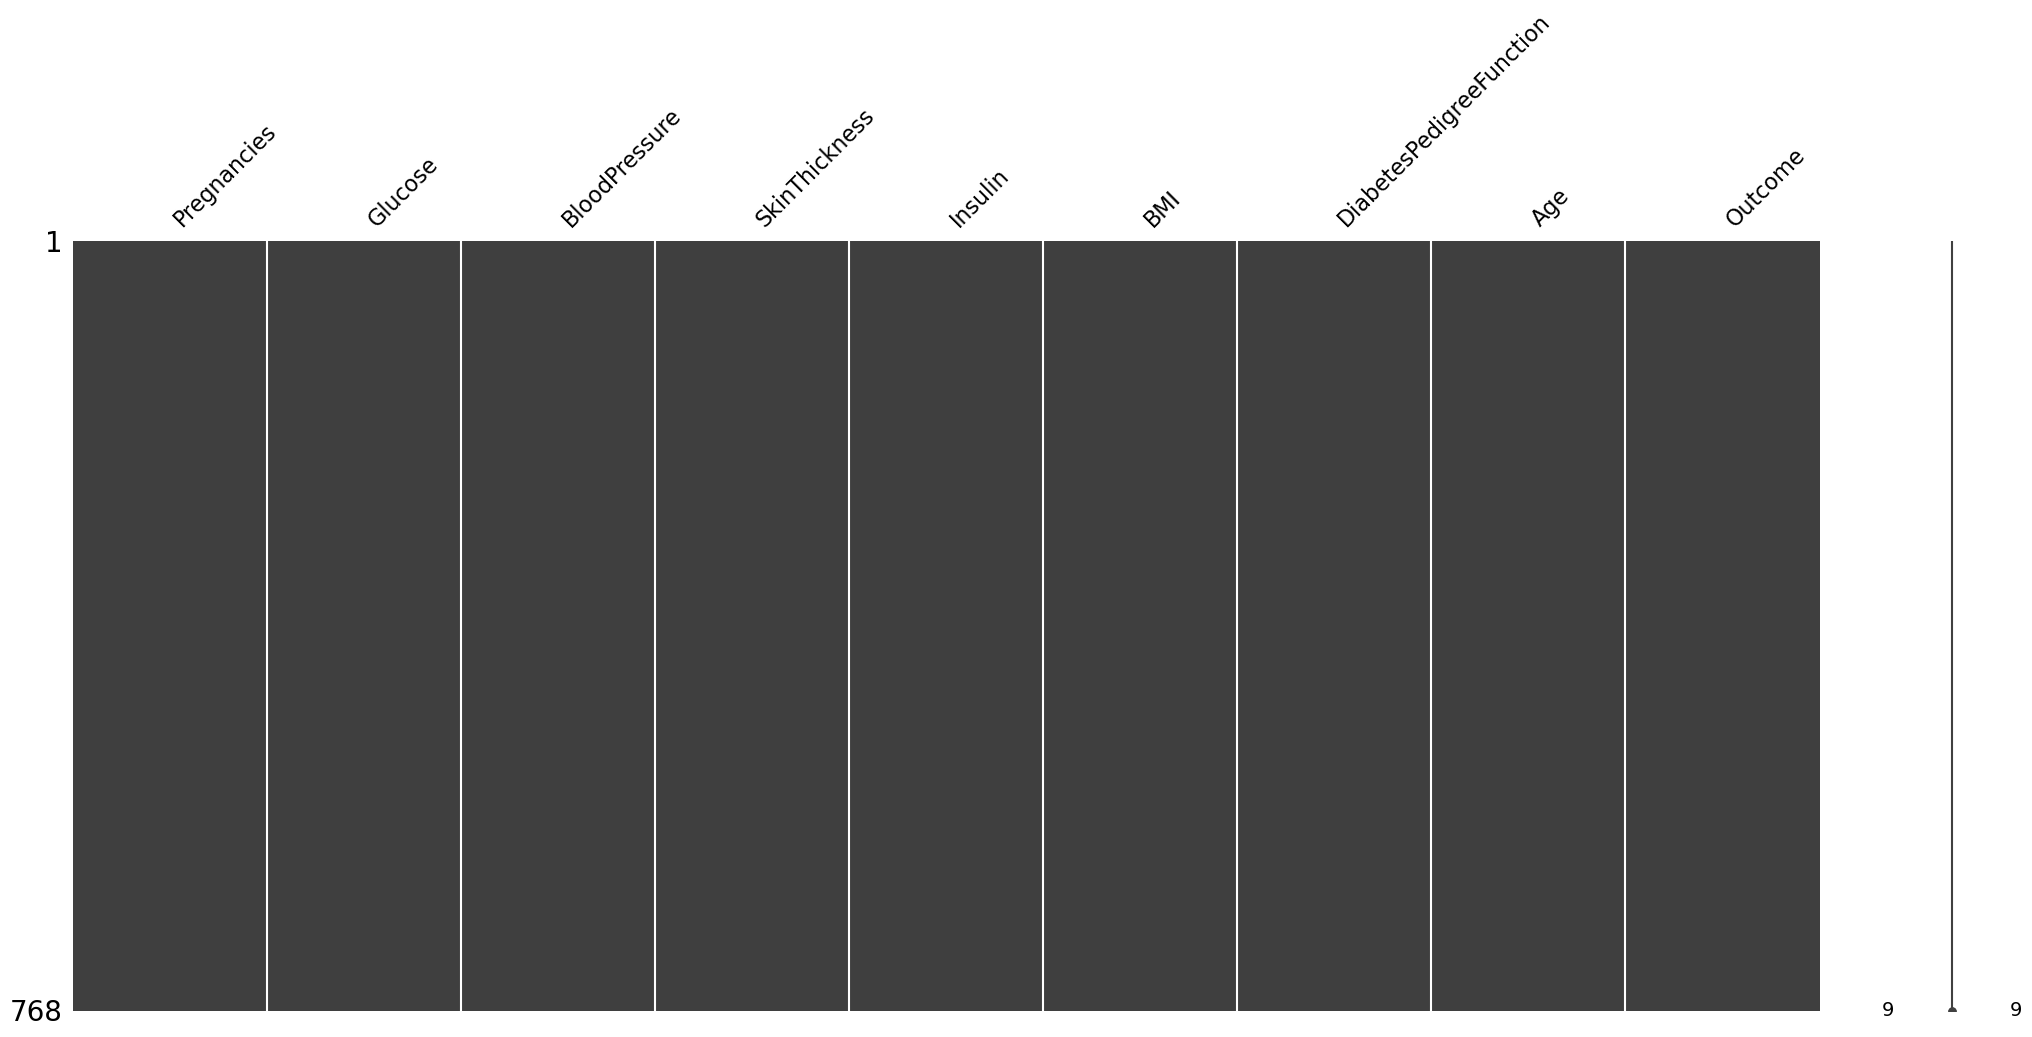

In [5]:
msno.matrix(df) #normalde eksik olan değerlerin rassallığını yapısal mı değil mi bunu inceleriz ama eksik değerimiz yok

In [6]:
from sklearn import preprocessing 

In [7]:
preprocessing.scale(df)#tüm değişkenleri standartlaştırmış oldu  tüm hepsi aynı oranda değiştiği için birbirleri arasındaki
#yapı değişmedi  bu Standardizasyon islemidir

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [8]:
#şimdi normalizasyon işlemine geçeceğiz 0 ile 1 arasına dönüştürmek için kullanılır
preprocessing.normalize(df) 

array([[0.03355185, 0.82761219, 0.40262215, ..., 0.00350617, 0.27959871,
        0.00559197],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.00295683, 0.26114412,
        0.        ],
       [0.04039717, 0.9240852 , 0.32317734, ..., 0.00339336, 0.16158867,
        0.00504965],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.00131885, 0.16149234,
        0.        ],
       [0.00665291, 0.83826692, 0.39917472, ..., 0.00232187, 0.31268687,
        0.00665291],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.00249308, 0.18203439,
        0.        ]])

In [10]:
sclr=preprocessing.MinMaxScaler(feature_range=(10,20)) #istediğimiz değerler arası dönüştürme işlemi yapıldı min max 
sclr.fit_transform(df)

array([[13.52941176, 17.43718593, 15.90163934, ..., 12.3441503 ,
        14.83333333, 20.        ],
       [10.58823529, 14.27135678, 15.40983607, ..., 11.16567037,
        11.66666667, 10.        ],
       [14.70588235, 19.1959799 , 15.24590164, ..., 12.53629377,
        11.83333333, 20.        ],
       ...,
       [12.94117647, 16.08040201, 15.90163934, ..., 10.71306576,
        11.5       , 10.        ],
       [10.58823529, 16.33165829, 14.91803279, ..., 11.15713066,
        14.33333333, 20.        ],
       [10.58823529, 14.67336683, 15.73770492, ..., 11.01195559,
        10.33333333, 10.        ]])

In [50]:
df["BMI_Age"]=df["BMI"]*df["Age"]
df["Age_Category"]=pd.cut(df["Age"],bins=[0,20,40,60,np.inf],labels=["0-20","20-40","40-60","60+"])
df["Glucosse_Category"]=pd.cut(df["Glucose"],bins=[0,70,100,125,np.inf],labels=["Low","Normal","Pre-diabetic","Diabetic"])

In [15]:
df["Glucosse_Category"]

0          Diabetic
1            Normal
2          Diabetic
3            Normal
4          Diabetic
           ...     
763    Pre-diabetic
764    Pre-diabetic
765    Pre-diabetic
766        Diabetic
767          Normal
Name: Glucosse_Category, Length: 768, dtype: category
Categories (4, object): ['Low' < 'Normal' < 'Pre-diabetic' < 'Diabetic']

In [16]:
#bu yukarıda oluşturduğum yeni değişkenler 2 değişkeni bi arada göstermeye yardımcı olabilir mesela
#age category yaşın diyabet riski üzerindeki etkisini daha net bir şekilde analiz etmeye yardımcı olabilir...

In [57]:
#Model oluşturulacak
#İlk bağımlı bağımsız değişkenleri ayırmalıyız
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
y=df["Outcome"] #outcome bağımlıdır ve 0 1 den oluşur
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) # Eğitim setleri ve test setleri oluştu

In [26]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: >

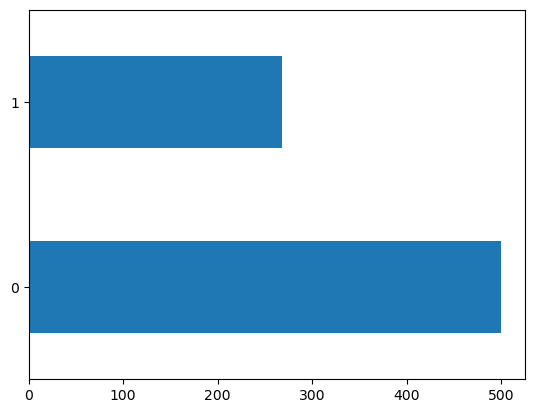

In [24]:
df["Outcome"].value_counts().plot.barh() #şeker hastası olup olmaması

In [59]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [60]:
loj=sm.Logit(y,X) #anlamlılık  p value değerlerini r square ...
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 May 2024   Pseudo R-squ.:                 0.05922
Time:                        14:19:45   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [1]:
loj=LogisticRegression(solver=("liblinear")) #model oluştu
loj_model=loj.fit(X,y)
y_pred=loj_model.predict(X)

NameError: name 'LogisticRegression' is not defined

In [75]:
#tahmin setleri
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [77]:
#sınıflandırma işlemleri olacak kanser mi değil mi  kredi kartı borcunu ödedi mi ödemedimi 1.sınıf işlem
confusion_matrix(y,y_pred) #karmaşıklık matrisi  gerçekte 1 iken 1 olan(448)  gerçekte 0 iken 1 denilenler (52)
#gerçekte 1 iken 0 denilenler(121) gerçekte 0 iken 0 denilenler (147)

array([[448,  52],
       [121, 147]], dtype=int64)

In [78]:
accuracy_score(y,y_pred)# doğru sınıflandırma oranımız

0.7747395833333334

In [79]:
print(classification_report(y,y_pred)) 

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [81]:
loj_model.predict(X)[0:5] #ben sadece 0 ve 1 olasılıklarını isterim

array([1, 0, 1, 0, 1], dtype=int64)

In [83]:
loj_model.predict_proba(X)[0:10] #olasılık değerleri

array([[0.35093834, 0.64906166],
       [0.9167465 , 0.0832535 ],
       [0.22496175, 0.77503825],
       [0.92105964, 0.07894036],
       [0.16807458, 0.83192542],
       [0.79857716, 0.20142284],
       [0.87973055, 0.12026945],
       [0.27755404, 0.72244596],
       [0.32068936, 0.67931064],
       [0.9223939 , 0.0776061 ]])

In [105]:
loj_model.predict_proba(X)[0:10][:,0:2]


array([[0.9167465 , 0.0832535 ],
       [0.22496175, 0.77503825],
       [0.92105964, 0.07894036],
       [0.16807458, 0.83192542],
       [0.79857716, 0.20142284],
       [0.87973055, 0.12026945],
       [0.27755404, 0.72244596],
       [0.32068936, 0.67931064],
       [0.9223939 , 0.0776061 ]])

In [87]:
loj_model.predict(X)[0:10] #tahmin edilen değerler mesela ilk değeri doğru tahmin etmişiz 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [89]:
y_probs=loj_model.predict_proba(X)
y_probs=y_probs[:,1]

In [90]:
y_probs[0:10]

array([0.64906166, 0.0832535 , 0.77503825, 0.07894036, 0.83192542,
       0.20142284, 0.12026945, 0.72244596, 0.67931064, 0.0776061 ])

In [91]:
y_pred=[1 if i >0.5 else 0 for i in y_probs] #tabloda 0.5ten büyük olanları yazdırsın  
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)


In [101]:
from sklearn.metrics import mean_squared_error
y_pred=rf_model.predict(X_test) #tahminler
np.sqrt(mean_squared_error(y_test,y_pred)) #hata kareler ortalaması

0.41561199854351333

In [103]:
rf_params={"max_depth":[2,3,5,8,10],
          "max_features":[2,5,8],
          "n_estimators":[10,500,1000],
          "min_samples_split":[2,5,10]}

In [104]:
rf_model_cv=GridSearchCV(rf_model,rf_params,cv=10,n_jobs=-1,verbose=2)
rf_model_cv.fit(X_train,y_train)  #buralardan doğru değerleri çekip parametreye geçireceğiz

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_tuned=RandomForestClassifier(max_depth=10,max_features=8,min_samples_split=10,n_estimators=1000).fit(X_train,y_train)
rf_tuned

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [110]:
y_pred=rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred) #ilkel skor  test setinde %75 doğruluk oranı ile başarılı sonuç çıkmıştır.

0.7532467532467533